In [22]:
import pandas as pd
import numpy as np

csv_file = 'full_merged_data_modified.csv'
df = pd.read_csv(csv_file)
df.shape

(8297, 56)

In [23]:
print(df.columns.tolist())

['package_name', 'description', 'package_created', 'last_modified', 'package_age', 'latest_version', 'months_since_latest_version_synk', 'version_release_frequency_months', 'version_release_frequency_years', 'num_versions_released', 'maintainers_length', 'dependencies_name', 'dependencies_count', 'dev_dependencies_name', 'dev_dependencies_count', 'readme_exists_npmjs', 'last_day_downloads', 'last_week_downloads', 'last_month_downloads', 'last_3_month_downloads', 'License', 'Health Score', 'vul_count', 'Security Recommendation', 'Popularity', 'Maintainence', 'Community', 'git_repository', 'stars', 'forks', 'git_unique_contributors', 'github_contributors', 'open_PRs', 'merged_PRs', 'open_issues', 'resolved_issues', 'total_commits', 'last_commit_before_months', 'months_since_last_commit', 'avg_commits_per_day', 'total_lines_added', 'total_lines_deleted', 'lines_added_one_and_half_year', 'lines_deleted_one_and_half_year', 'readme_updated', 'LOC', 'sloc_javascript', 'sloc_typescript', 'cycl

In [24]:
print(df['months_since_latest_version_synk'].isnull().sum())
print(df['months_since_last_commit'].isnull().sum())

0
394


In [25]:
df

,package_name,description,package_created,last_modified,package_age,latest_version,months_since_latest_version_synk,version_release_frequency_months,version_release_frequency_years,num_versions_released,...,sloc_javascript,sloc_typescript,cyclomatic_complexity,Install Size,# of Files,TS Typings,Deprecated,Trivial,Dead,Inactive
0,is-equal-shallow,"Does a shallow comparison of two objects, retu...",2015-02-17,2022-06-19,108.0,0.1.3,108.0,0.87,10.58,5.0,...,17.0,0.0,12.0,0 B,0.0,No,False,False,False,True
1,rexponse,Express REST API Response Handler,2020-02-20,2022-05-15,48.0,0.3.0,48.0,0.00,0.00,4.0,...,217.0,0.0,20.0,7.3 kB,3.0,No,False,False,False,False
2,eslint-plugin-no-extension-in-require,A plugin for ESLint that ensures that the path...,2015-04-27,2022-06-17,108.0,0.2.0,108.0,0.00,0.00,3.0,...,69.0,0.0,35.0,0 B,0.0,No,False,False,False,False
3,fluids,Glue layer for reactivity,2019-10-04,2022-05-02,48.0,0.3.0,36.0,1.12,13.66,25.0,...,0.0,142.0,11.0,38.8 kB,12.0,No,False,False,False,False
4,spotifyweb-api,lib de JS com TDD,2017-09-15,2022-06-26,72.0,1.0.5,72.0,0.00,0.00,2.0,...,332.0,0.0,3.0,0 B,0.0,No,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,insomnia-plugin-customtimestamp,Create a custom timestamp in insomnia rest client,2017-12-11,2022-06-19,72.0,1.0.3,60.0,0.00,0.00,4.0,...,155.0,0.0,18.0,97.1 kB,5.0,No,False,False,False,True
8293,project-showcaser,Showcase or Display your Github projects on yo...,2021-10-12,2022-05-13,24.0,0.1.0,24.0,0.00,0.00,4.0,...,68.0,0.0,5.0,8.89 kB,14.0,No,False,False,False,False
8294,pkginfo-json5,An easy way to expose properties on a module f...,2015-07-21,2022-06-24,108.0,0.5.0,108.0,0.18,2.20,2.0,...,115.0,0.0,21.0,0 B,0.0,No,False,False,False,False
8295,nitro-sg,Nitro UI Styleguide + React component dev env,2019-05-28,2022-05-10,60.0,3.0.2,60.0,4.54,55.23,2.0,...,2781.0,0.0,12.0,1.93 MB,300.0,No,False,False,False,False


In [26]:
iqr_latest_version = np.nanpercentile(df['months_since_latest_version_synk'], 75) - np.nanpercentile(df['months_since_latest_version_synk'], 25)
iqr_last_commit = np.nanpercentile(df['months_since_last_commit'], 75) - np.nanpercentile(df['months_since_last_commit'], 25)

percentile_latest_version = np.nanpercentile(df['months_since_latest_version_synk'], 25) - 0.1 * iqr_latest_version
percentile_last_commit = np.nanpercentile(df['months_since_last_commit'], 25) - 0.1 * iqr_last_commit

condition_nan = np.isnan(df['months_since_latest_version_synk']) | np.isnan(df['months_since_last_commit'])

df['Dead'] = np.where(condition_nan, np.nan, 'nan')
if not condition_nan.all():
    condition_threshold = (df['months_since_latest_version_synk'] > percentile_latest_version) & \
                          (df['months_since_last_commit'] > percentile_last_commit)

    df['Dead'][~condition_nan] = np.where(condition_threshold, 'True', 'False')

print(df)

                               package_name  \
0                          is-equal-shallow   
1                                  rexponse   
2     eslint-plugin-no-extension-in-require   
3                                    fluids   
4                            spotifyweb-api   
...                                     ...   
8292        insomnia-plugin-customtimestamp   
8293                      project-showcaser   
8294                          pkginfo-json5   
8295                               nitro-sg   
8296                            cloud-blaze   

                                            description package_created  \
0     Does a shallow comparison of two objects, retu...      2015-02-17   
1                     Express REST API Response Handler      2020-02-20   
2     A plugin for ESLint that ensures that the path...      2015-04-27   
3                             Glue layer for reactivity      2019-10-04   
4                                     lib de JS com TDD     

/var/folders/85/824q5vtd5cs_h78v6c6kddwm0000gn/T/ipykernel_4598/1306565133.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dead'][~condition_nan] = np.where(condition_threshold, 'True', 'False')


In [27]:
print((df['Dead'] == 'True').sum())
print((df['Dead'] == 'False').sum())
print((df['Dead'] == 'nan').sum())

num_dead_yes = (df['Dead'] == 'True').sum()
total_rows = len(df)
num_dead_no = (df['Dead'] == 'False').sum()

percentage_dead_yes = (num_dead_yes / (num_dead_yes + num_dead_no)) * 100
print("Percentage of 'dead' = 'yes': {:.2f}%".format(percentage_dead_yes))

5782
2121
394
Percentage of 'dead' = 'yes': 73.16%


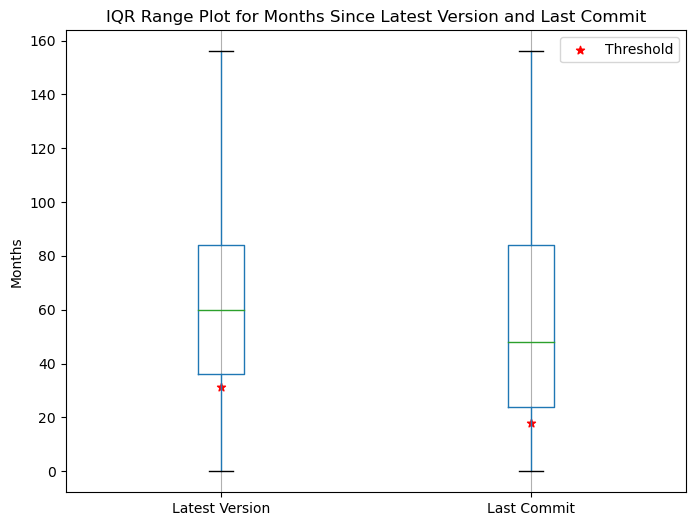

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df.boxplot(column=['months_since_latest_version_synk', 'months_since_last_commit'], showfliers=False)
plt.title('IQR Range Plot for Months Since Latest Version and Last Commit')
plt.ylabel('Months')
plt.xticks([1, 2], ['Latest Version', 'Last Commit'])
plt.scatter([1], [31.2], marker='*', color='r', label='Threshold')
plt.scatter([2], [18], marker='*', color='r')
plt.grid(axis='y')
plt.legend()
plt.show()

In [29]:
print(percentile_latest_version)
print(percentile_last_commit)

31.2
18.0


In [30]:
file_path = "full_merged_data_modified_1.csv"

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)

# Print a message indicating that the file has been saved
print("DataFrame saved as CSV file:", file_path)

DataFrame saved as CSV file: full_merged_data_modified_1.csv
